In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.plotly as py
import seaborn as sns


In [5]:
air_quality_data = os.path.join('Data Sets',"Air_Quality_data.csv")
air_quality_df = pd.read_csv(air_quality_data, skipinitialspace = True)
air_quality_df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [6]:
renamed_df = air_quality_df.rename(columns={"StateName":"State",
                                            "CountyName":"County",
                                            "ReportYear":"Year"})
renamed_df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,State,CountyFips,County,Year,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [7]:
#df[list("ABCD")] = df[list("ABCD")].astype(int)
imp_col = renamed_df[["State", 'Year', "Value"]]
imp_col1 = renamed_df[["State","Value"]]

In [8]:
data_grouped1 = imp_col1.groupby(['State']).mean().astype(int)/100000
data_grouped1 = data_grouped1.reset_index()
data_grouped1.head()

,State,Value
0,Alabama,2.52399
1,Alaska,2.12128
2,Arizona,24.43865
3,Arkansas,0.49399
4,California,106.43663


In [9]:
data_grouped = imp_col.groupby(['State', 'Year']).mean().astype(int)/100000
data_grouped.reset_index().head()

,State,Year,Value
0,Alabama,1999,23.19224
1,Alabama,2000,17.20400
2,Alabama,2001,2.87792
3,Alabama,2002,2.97879
4,Alabama,2003,2.04432


In [10]:
vul_pops_and_env_data = os.path.join('Data Sets', "VUNERABLEPOPSANDENVHEALTH.csv")
vul_pops_and_env_df = pd.read_csv(vul_pops_and_env_data, skipinitialspace = True)
vul_pops_and_env_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,...,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,EH_Time_Span_Start,EH_Time_Span_End,No.of years,Toxic_chem_per_year
0,1,1,Autauga,Alabama,AL,29,6690,774,1727,2680,...,1,1,1,1,1,1,1999,2003,4,720799.250000
1,1,3,Baldwin,Alabama,AL,16,20254,2533,4933,9354,...,1,1,1,2,1,1,2001,2003,2,17832.000000
2,1,5,Barbour,Alabama,AL,51,6729,569,1302,1618,...,1,1,1,1,1,1,1999,2003,4,12468.500000
3,1,7,Bibb,Alabama,AL,42,5355,358,900,1218,...,1,1,1,1,1,1,1994,2003,9,811.333333
4,1,9,Blount,Alabama,AL,28,11181,819,2217,3164,...,1,1,1,1,1,1,1999,2003,4,222255.000000


In [11]:
renamed_vul_pops_df = vul_pops_and_env_df.rename(columns={"CHSI_State_Name":"State",
                                                         "Toxic_chem_per_year":"Toxic_chem"})
renamed_vul_pops_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,State,CHSI_State_Abbr,Strata_ID_Number,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,...,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,EH_Time_Span_Start,EH_Time_Span_End,No.of years,Toxic_chem
0,1,1,Autauga,Alabama,AL,29,6690,774,1727,2680,...,1,1,1,1,1,1,1999,2003,4,720799.250000
1,1,3,Baldwin,Alabama,AL,16,20254,2533,4933,9354,...,1,1,1,2,1,1,2001,2003,2,17832.000000
2,1,5,Barbour,Alabama,AL,51,6729,569,1302,1618,...,1,1,1,1,1,1,1999,2003,4,12468.500000
3,1,7,Bibb,Alabama,AL,42,5355,358,900,1218,...,1,1,1,1,1,1,1994,2003,9,811.333333
4,1,9,Blount,Alabama,AL,28,11181,819,2217,3164,...,1,1,1,1,1,1,1999,2003,4,222255.000000


In [12]:
imp_vul_pops_col1 = renamed_vul_pops_df[["State", "Toxic_chem", "Major_Depression"]]
imp_vul_pops_col1.head()

,State,Toxic_chem,Major_Depression
0,Alabama,720799.250000,2680
1,Alabama,17832.000000,9354
2,Alabama,12468.500000,1618
3,Alabama,811.333333,1218
4,Alabama,222255.000000,3164


In [13]:
data_grouped3 = imp_vul_pops_col1.groupby(['State']).mean().astype(int).reset_index()
final1_df = data_grouped3.set_index("State")
final1_df.head()

,Toxic_chem,Major_Depression
State,,
Alabama,628887,3825
Alaska,2513699,1271
Arizona,1210822,21471
Arkansas,143740,2353
California,398339,31407


In [14]:
imp_vul_pops_col = renamed_vul_pops_df[["State", "Toxic_chem"]]
imp_vul_pops_col.head()

,State,Toxic_chem
0,Alabama,720799.250000
1,Alabama,17832.000000
2,Alabama,12468.500000
3,Alabama,811.333333
4,Alabama,222255.000000


In [15]:
data_grouped2 = imp_vul_pops_col.groupby(['State']).mean().astype(int).reset_index()
data_grouped2.head()

,State,Toxic_chem
0,Alabama,628887
1,Alaska,2513699
2,Arizona,1210822
3,Arkansas,143740
4,California,398339


In [16]:
data_merged = pd.merge(data_grouped1,data_grouped2, on="State", how='outer')
final_df = data_merged.set_index("State")

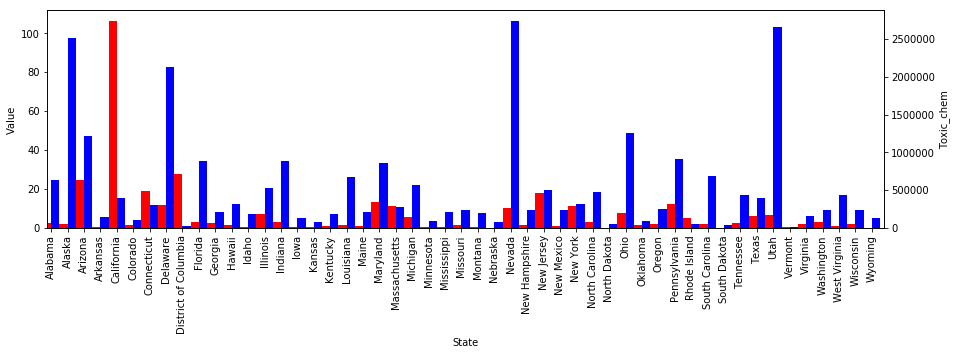

In [17]:
fig = plt.figure(figsize=(15,4))# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

final_df.Value.plot(kind='bar', color='red', ax=ax, width=width, position=1)
final_df.Toxic_chem.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Value')
ax2.set_ylabel('Toxic_chem')

plt.show()

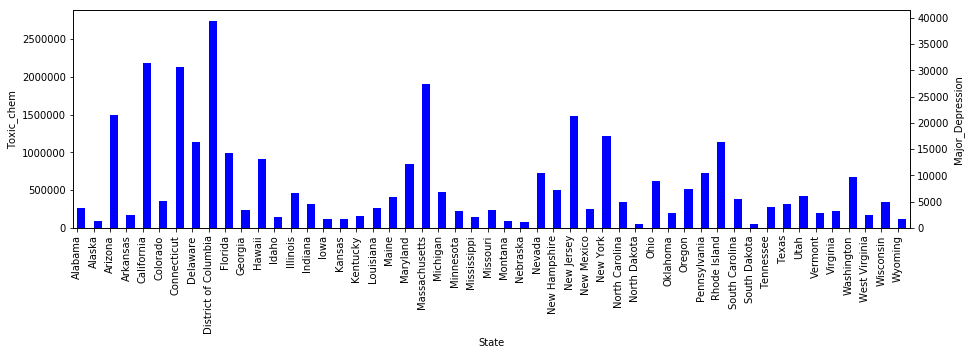

In [18]:
fig = plt.figure(figsize=(15,4))# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

final1_df.Toxic_chem.plot(kind='bar', color='white', ax=ax, width=width, position=1)
final1_df.Major_Depression.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Toxic_chem')
ax2.set_ylabel('Major_Depression')

plt.show()

In [19]:
data_merged1 = pd.merge(data_grouped1,data_grouped3, on="State", how='outer')

final2_df = data_merged.set_index("State")
final2_df.head()

,Value,Toxic_chem
State,,
Alabama,2.52399,628887
Alaska,2.12128,2513699
Arizona,24.43865,1210822
Arkansas,0.49399,143740
California,106.43663,398339


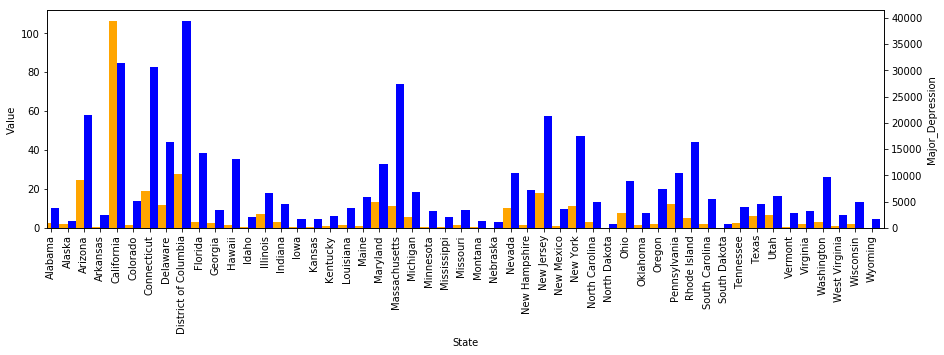

In [20]:
fig = plt.figure(figsize=(15,4))# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

final2_df.Value.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
final1_df.Major_Depression.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Value')
ax2.set_ylabel('Major_Depression')

plt.show()

In [21]:
health_data = os.path.join('Data Sets',"SUMMARYMEASURESOFHEALTH.csv")
health_df = pd.read_csv(health_data, skipinitialspace = True)
health_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
0,1,1,Autauga,Alabama,AL,29,74.9,74.5,78.0,76.5,...,22.8,17.1,15.5,28.2,7.5,4.0,8.8,6,5.4,9.7
1,1,3,Baldwin,Alabama,AL,16,76.6,75.5,78.2,76.5,...,20.4,17.1,12.4,18.3,6.7,5.6,7.4,6,5.7,7.7
2,1,5,Barbour,Alabama,AL,51,74.5,72.3,77.3,76.5,...,31.7,17.1,13.2,29.6,-1111.1,5.5,8.0,6,-1111.1,-1111.1
3,1,7,Bibb,Alabama,AL,42,73.2,73.3,77.8,76.5,...,29.3,17.1,10.1,28.7,-1111.1,4.7,8.2,6,-1111.1,-1111.1
4,1,9,Blount,Alabama,AL,28,76.1,74.9,79.4,76.5,...,24.6,17.1,19.6,32.1,7.9,4.2,7.8,6,6.0,9.8


In [22]:
health_df[health_df["ALE"] == -2222.2]

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
87,2,232,Skagway-Hoonah-Angoon,Alaska,AK,80,-2222.2,-2222.2,-2222.2,-2222.2,...,23.1,17.1,-1111.1,-1111.1,-1111.1,3.4,7.4,6,-1111.1,-1111.1
92,2,282,Yakutat,Alaska,AK,78,-2222.2,-2222.2,-2222.2,-2222.2,...,21.2,17.1,-1111.1,-1111.1,-1111.1,3.2,7.5,6,-1111.1,-1111.1


In [23]:
health_df["ALE"].replace(-2222.2, np.NaN, inplace=True)


In [24]:
health_df[health_df["CHSI_State_Abbr"] == "AK"]

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
67,2,13,Aleutians East,Alaska,AK,80,76.9,75.8,80.8,76.5,...,23.1,17.1,-1111.1,-1111.1,-1111.1,3.4,7.4,6,-1111.1,-1111.1
68,2,16,Aleutians West,Alaska,AK,78,76.9,75.7,80.8,76.5,...,21.2,17.1,-1111.1,-1111.1,-1111.1,3.2,7.5,6,-1111.1,-1111.1
69,2,20,Anchorage,Alaska,AK,9,76.9,76.5,79.3,76.5,...,14.4,17.1,-1111.1,-1111.1,-1111.1,4.8,6.4,6,-1111.1,-1111.1
70,2,50,Bethel,Alaska,AK,86,76.9,66.6,77.8,76.5,...,36.0,17.1,-1111.1,-1111.1,-1111.1,3.9,9.9,6,-1111.1,-1111.1
71,2,60,Bristol Bay,Alaska,AK,78,76.9,75.7,80.8,76.5,...,21.2,17.1,-1111.1,-1111.1,-1111.1,3.2,7.5,6,-1111.1,-1111.1
72,2,68,Denali,Alaska,AK,78,76.9,75.7,80.8,76.5,...,21.2,17.1,-1111.1,-1111.1,-1111.1,3.2,7.5,6,-1111.1,-1111.1
73,2,70,Dillingham,Alaska,AK,83,76.9,75.3,78.2,76.5,...,36.6,17.1,-1111.1,-1111.1,-1111.1,4.6,9.3,6,-1111.1,-1111.1
74,2,90,Fairbanks North Star,Alaska,AK,17,76.9,76.2,79.9,76.5,...,16.6,17.1,-1111.1,-1111.1,-1111.1,4.5,6.8,6,-1111.1,-1111.1
75,2,100,Haines,Alaska,AK,80,76.9,75.8,80.8,76.5,...,23.1,17.1,-1111.1,-1111.1,-1111.1,3.4,7.4,6,-1111.1,-1111.1
76,2,110,Juneau,Alaska,AK,47,76.9,76.4,79.8,76.5,...,18.8,17.1,-1111.1,-1111.1,-1111.1,4.5,7.5,6,-1111.1,-1111.1


In [25]:
renamed_health_df = health_df.rename(columns={"CHSI_State_Name":"State",
                                                         "ALE":"Average_Life_Expectancy"})
renamed_health_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,State,CHSI_State_Abbr,Strata_ID_Number,Average_Life_Expectancy,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
0,1,1,Autauga,Alabama,AL,29,74.9,74.5,78.0,76.5,...,22.8,17.1,15.5,28.2,7.5,4.0,8.8,6,5.4,9.7
1,1,3,Baldwin,Alabama,AL,16,76.6,75.5,78.2,76.5,...,20.4,17.1,12.4,18.3,6.7,5.6,7.4,6,5.7,7.7
2,1,5,Barbour,Alabama,AL,51,74.5,72.3,77.3,76.5,...,31.7,17.1,13.2,29.6,-1111.1,5.5,8.0,6,-1111.1,-1111.1
3,1,7,Bibb,Alabama,AL,42,73.2,73.3,77.8,76.5,...,29.3,17.1,10.1,28.7,-1111.1,4.7,8.2,6,-1111.1,-1111.1
4,1,9,Blount,Alabama,AL,28,76.1,74.9,79.4,76.5,...,24.6,17.1,19.6,32.1,7.9,4.2,7.8,6,6.0,9.8


In [26]:
imp_health = renamed_health_df[["State", "Average_Life_Expectancy"]]

imp_health.head()

,State,Average_Life_Expectancy
0,Alabama,74.9
1,Alabama,76.6
2,Alabama,74.5
3,Alabama,73.2
4,Alabama,76.1


In [27]:
data_grouped4 = imp_health.groupby(['State']).mean().astype(int).reset_index()
data_grouped4.head()

,State,Average_Life_Expectancy
0,Alabama,74
1,Alaska,76
2,Arizona,77
3,Arkansas,74
4,California,77


In [34]:
data_merged4 = pd.merge(data_grouped3,data_grouped4, on="State", how='outer')

final4_df = data_merged4.set_index("State")
final4_df

,Toxic_chem,Major_Depression,Average_Life_Expectancy
State,,,
Alabama,628887,3825,74
Alaska,2513699,1271,76
Arizona,1210822,21471,77
Arkansas,143740,2353,74
California,398339,31407,77
Colorado,107158,5132,78
Connecticut,302347,30706,78
Delaware,2129802,16299,76
District of Columbia,19932,39452,72


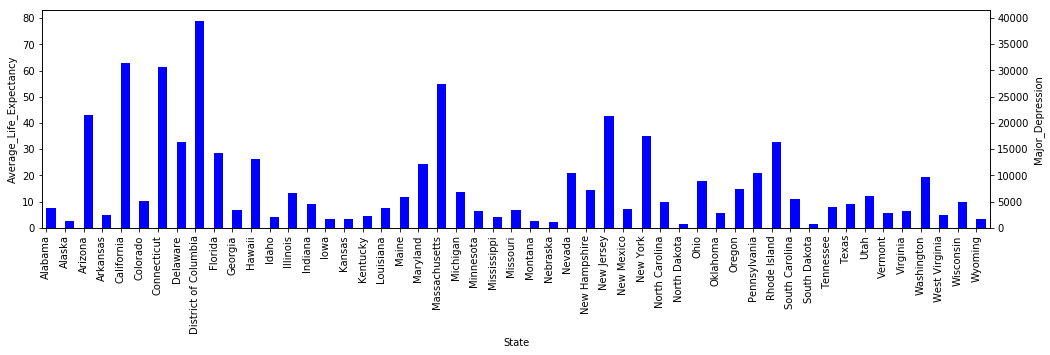

In [29]:
fig = plt.figure(figsize=(17,4))# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

final4_df.Average_Life_Expectancy.plot(kind='bar', color='white', ax=ax, width=width, position=1)
final4_df.Major_Depression.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Average_Life_Expectancy')
ax2.set_ylabel('Major_Depression')

plt.show()

In [30]:
risk_factor_data = os.path.join('Data Sets',"RISKFACTORSANDACCESSTOCARE.csv")
risk_factor_df = pd.read_csv(risk_factor_data, skipinitialspace = True)
risk_factor_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [31]:
imp_risk_factor = risk_factor_df[["CHSI_State_Name", "No_Exercise", "Obesity"]]
imp_risk_factor["No_Exercise"].replace(-1111.1, np.NaN, inplace=True)
imp_risk_factor["Obesity"].replace(-1111.1, np.NaN, inplace=True)
imp_risk_factor.head()

/Users/vinu/anaconda3/envs/pythonData/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,CHSI_State_Name,No_Exercise,Obesity
0,Alabama,27.8,24.5
1,Alabama,27.2,23.6
2,Alabama,NaN,25.6
3,Alabama,NaN,NaN
4,Alabama,33.5,24.2


In [32]:
data_grouped5 = imp_risk_factor.groupby(['CHSI_State_Name']).sum()
data_grouped5.head()

,No_Exercise,Obesity
CHSI_State_Name,,
Alabama,1191.8,1102.8
Alaska,0.0,0.0
Arizona,355.0,313.3
Arkansas,2000.9,1698.6
California,811.9,763.5


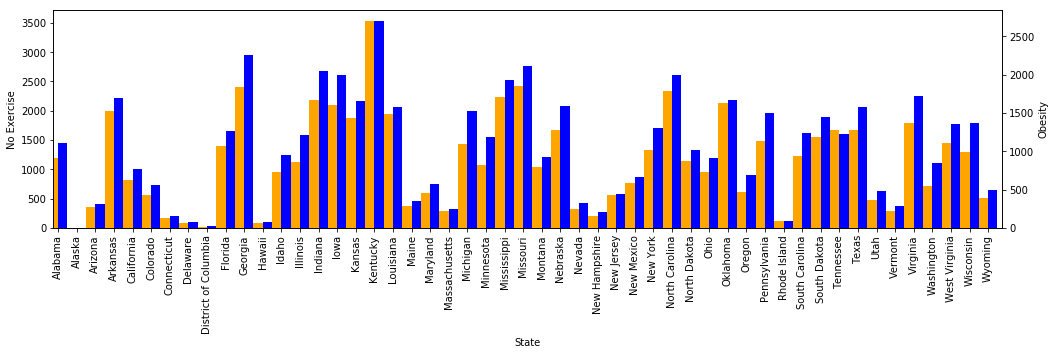

In [33]:
fig = plt.figure(figsize=(17,4))# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

data_grouped5.No_Exercise.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
data_grouped5.Obesity.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('No Exercise')
ax2.set_ylabel('Obesity')

plt.show()